## What will the customer buy again? 
## Predicting Purchase Behavior on E-Commerce Data

Problem Statement
You have to use the data provided and your understanding of the problem to answer the following questions (for the first 3, you can use either visualizations or tables with stats):

1)	When do customers order the most?
    -	Day of the week
    -	Time of the day
    -	Combination of the above two.

2)	What are the top 5 products?
    -	That are ordered.
    -	That are reordered.

3)	What is the reorder ratio for each department?

4)	Build a model to predict which previously purchased products will be in a user’s next order.


In [1]:
import pandas as pd
import numpy as np
import math
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split     # cross_validation
import scipy.stats as stats

import seaborn as sns

# feature selection
from sklearn.feature_selection import f_regression as fs

# cross validation
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
#%matplotlib notebook

from sklearn.preprocessing import StandardScaler

#model building
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import preprocessing

# keras libraries
import tensorflow as tf
import keras as k

# initialise the neural network
from keras.models import Sequential

# to build the layers in the ANN
from keras.layers import Dense


#model checking
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
#from pandas_ml import ConfusionMatrix

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Using TensorFlow backend.


In [2]:
# Reading the input files and storing in dataframes using pandas

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\aisles.csv"
aisles_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\departments.csv"
departments_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\order_products_prior.csv"
order_products_prior_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\order_products_test.csv"
order_products_test_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\order_products_train.csv"
order_products_train_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\orders.csv"
orders_df =pd.read_csv(filename)

filename = "D:\\MLP PROJECT\\Project and Data Sets\\Data\\products.csv"
products_df =pd.read_csv(filename)

# 1. Data Overview:

In [3]:
#checking the shape of the dataframe
aisles_df.shape

(134, 2)

In [4]:
#checking for information of data frame
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# checking first 5 observations
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# checking for null values
aisles_df.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [7]:
# checking for shape of the dataframe i.e. number of row and columns
departments_df.shape

(21, 2)

In [8]:
# chekcing information of dataframe, i.e. index, column datatype etc.
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [9]:
# checking for first 5 rows
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
# checking for null values
departments_df.isnull().sum()

department_id    0
department       0
dtype: int64

In [11]:
# checking for shape of the dataframe i.e. number of row and columns
products_df.shape

(49688, 4)

In [12]:
# chekcing information of dataframe, i.e. index, column datatype etc.
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
# checking for first 5 rows
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
# checking for null values
products_df.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [15]:
len(products_df['product_id'].unique())

49688

In [16]:
# checking for shape of the dataframe i.e. number of row and columns
orders_df.shape

(2186548, 8)

In [17]:
# chekcing information of dataframe, i.e. index, column datatype etc.
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186548 entries, 0 to 2186547
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   days_since_prior_order  float64
 2   eval_set                object 
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   order_id                int64  
 6   order_number            int64  
 7   user_id                 int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 133.5+ MB


In [18]:
# checking for first 5 rows
orders_df.head(11)

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
0,0,NaN,prior,2,8,2539329,1,1
1,1,15.0,prior,3,7,2398795,2,1
2,2,21.0,prior,3,12,473747,3,1
3,3,29.0,prior,4,7,2254736,4,1
4,4,28.0,prior,4,15,431534,5,1
5,5,19.0,prior,2,7,3367565,6,1
6,6,20.0,prior,1,9,550135,7,1
7,7,14.0,prior,1,14,3108588,8,1
8,8,0.0,prior,1,16,2295261,9,1
9,9,30.0,prior,4,8,2550362,10,1


In [19]:
# checking if null values are present

orders_df.isnull().sum()

Unnamed: 0                     0
days_since_prior_order    131721
eval_set                       0
order_dow                      0
order_hour_of_day              0
order_id                       0
order_number                   0
user_id                        0
dtype: int64

### Observation:
    
    It can be observed, as mentioned in the problem statement, there are NULL values present in "days_since_prior_order". The number of NULL values is found to be 131,721.
    We shall now verify if these NULL values pertain only for the first order of each customer or can be found else where.

In [20]:
# Checking of null values
orders_df['order_number'][orders_df['days_since_prior_order'].isnull() == True].value_counts()

 1    131415
-1       306
Name: order_number, dtype: int64

### Observation:
   From above we observe that the NULL values is found when order_number is 1 and -1.
   We shall check the significance of the negative order_number.

#### Before doing further analysis on null values we shall analyse the dataframe and the values that are appearing in all the columns, for further decisions

In [21]:
orders_columns = orders_df.columns
for i in orders_columns:
    print(i + ":",len(orders_df[i].unique()))

Unnamed: 0: 2186548
days_since_prior_order: 32
eval_set: 3
order_dow: 67
order_hour_of_day: 24
order_id: 2178586
order_number: 197
user_id: 131209


In [22]:
#checking for number of users/customers
orders_df['user_id'].nunique()

131209

### Observation : 
    There are 131,209 unique user_ids present in the given data

In [23]:
# types of evaluation sets
orders_df['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [24]:
# checking for unique values appearing in column order_dow
orders_df['order_dow'].unique()

array([ 2,  3,  4,  1,  5,  0,  6, 52, 76, 79, 95, 54, 96, 55, 86, 77, 44,
       72, 93, 94, 43, 60, 50, 80, 87, 85, 65, 90, 74, 82, 97, 49, 67, 58,
       48, 66, 81, 46, 56, 98, 45, 71, 83, 91, 99, 63, 68, 70, 53, 57, 51,
       73, 41, 92, 84, 75, 89, 47, 64, 69, 61, 62, 42, 59, 40, 78, 88],
      dtype=int64)

### Observation:
    For the "order_dow", we expect the values to range from 0-6 i.e. 7 days of the week
    However, here we observe values other than 0-6. The values are found to be in the range of 40-99.
    

In [25]:
# as the date of week should have logical values of 0-6 only, so to see the destribution of the total records of orders_df
# with respect to this column we have divided this column in two groups less than 7 and greater than 6 and taken count

print(orders_df['order_dow'][orders_df['order_dow'] < 7].nunique())
print(len(orders_df['order_dow'][orders_df['order_dow'] < 7]))


7
2183056


In [26]:
print(orders_df['order_dow'][orders_df['order_dow'] > 6].nunique())
len(orders_df['order_dow'][orders_df['order_dow'] > 6])

60


3492

### Observation :
      On further analysis it is observed that values for "order_dow" majorly range from 0-6 appears (2,183,056 out of 
      2,186,548 i.e. 99.84%),
      Where as values ranging from 40-99 (60 unique values) appear in very few cases (3,492 out of 2,186,548 i.e 0.16%).
      Before taking any decision regarding these values, we have to further see why/or in which cases these values appear.

In [27]:
# creating empty dataframe to store all the rows where order_id having value of Day of week greater than 6
dow_orderID_repeat = pd.DataFrame(columns=orders_df.columns)

In [28]:
# number of unique order_id where value of order_dow column is greater than 6
dow_orderID = orders_df['order_id'][orders_df['order_dow'] > 6].unique()
len(dow_orderID)

3492

In [29]:
# storeing all the rows from orders_df where order_ids are from dow_orderID
for i in dow_orderID:
    dow_orderID_repeat = dow_orderID_repeat.append(orders_df[orders_df['order_id']==i])

In [30]:
#checking the shape of dataframe dow_oderID_repeat
dow_orderID_repeat.shape

(6994, 8)

### Observation :
       From above we can see that dow_orderID_repeat dataframe (order_id having value of "order_dow" greater than 6) has 
       6994 rows, but number of unique order_id's are 3492.
       i.e. Assuming that these order_id's are repeating, the total rows in dow_orderID_repeat should be equal to 
       3492 * 2 = 6984.
       There is difference of (6994-6984 = 10). Hence it can be inferred that 10 order_id's appear thirce, while the rest
       twice.

In [31]:
# creating empty dataframe to store all the rows where order_id having values of order_number negative
negative_order_no_orderID_repeat = pd.DataFrame(columns=orders_df.columns)

In [32]:
# number of unique order_id where value of order_number column is negative
negative_order_no_orderID = orders_df['order_id'][orders_df['order_number']<0].unique()
len(negative_order_no_orderID)

4470

In [33]:
# storeing all the rows from orders_df where order_ids are from dow_orderID
for i in negative_order_no_orderID:
    negative_order_no_orderID_repeat = negative_order_no_orderID_repeat.append(orders_df[orders_df['order_id']==i])

In [34]:
#checking the shape of dataframe negative_order_no_oderID_repeat
negative_order_no_orderID_repeat.shape

(8950, 8)

### Observation :
   It can be observed that the no of Order IDs with negative Order Nos is 8950.
   Of these the no. of unique Order IDs is 4470
   Asuuming that each order ID appers twice, the total no of order IDs is expected to be 4470 * 2 = 8940.
   There is difference of (8950-8940 = 10), hence it can be inferred that 10 order_id's appear thrice while the rest twice.

#### To Check:
We shall now identify the similar order_ids "dow_orderID_repeat" and "negative_order_no_orderID_repeat"

In [35]:
#checking for the common order_id's appearing in both dow_orderID_repeat and negative_order_no_orderID_repeat
orderid_repeat_3times = set(dow_orderID_repeat['order_id'].unique()).intersection(
    set(negative_order_no_orderID_repeat['order_id'].unique()))

In [36]:
len(orderid_repeat_3times)

10

### Observation:
    It can be thus observed that these 10 order_id's that appear thrice are found in both the dataframes.

In [37]:
# creating empty dataframe to store all the rows where order_id repeates 3times in order_df
orderID_repeat_3times_df = pd.DataFrame(columns=orders_df.columns)

In [38]:
# storeing all the rows from orders_df where order_ids are from dow_orderID
for i in set(dow_orderID_repeat['order_id'].unique()).intersection(set(negative_order_no_orderID_repeat['order_id'].unique())):
    orderID_repeat_3times_df = orderID_repeat_3times_df.append(orders_df[orders_df['order_id']==i])

In [39]:
orderID_repeat_3times_df.shape

(30, 8)

In [40]:
orderID_repeat_3times_df.head(6)

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
1364104,1364104,0.0,prior,1,10,2599425,38,128683
2182155,2182155,0.0,prior,1,10,2599425,-38,128683
2184559,2184559,0.0,prior,71,10,2599425,38,128683
1930462,1930462,NaN,prior,6,10,596966,1,182889
2181238,2181238,NaN,prior,6,10,596966,-1,182889
2185040,2185040,NaN,prior,76,10,596966,1,182889


### Observation:
    It is observed that there are repeatative order_id's present in orders_df dataframe with positive and the corresponding 
    negarive order nos.
    We can assume the following reasons for repetition of order_id's: Credit/debit note raised or discount given for the 
    respective orders.
    With this we infer that there is no impact of the extra order_id's present in the orders_df dataframe in our decision 
    making, so we shall drop them.
    

In [41]:
#checking the shape of the dataframe
order_products_prior_df.shape

(32434489, 4)

In [42]:
#checking for information of data frame
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [43]:
# checking first 5 observations
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [44]:
# checking for null values
order_products_prior_df.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [45]:
# checking for number of unique values in all the columns of order_products_prior_df
OPP_columns = order_products_prior_df.columns
for i in OPP_columns:
    print(i + ":" , len(order_products_prior_df[i].unique()))

order_id: 3214874
product_id: 49677
add_to_cart_order: 145
reordered: 2


In [46]:
# checking of unique values
order_products_prior_df['add_to_cart_order'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145], dtype=int64)

In [47]:
order_products_prior_df['reordered'].unique()

array([1, 0], dtype=int64)

In [48]:
#checking the shape of the dataframe
order_products_train_df.shape

(1068168, 5)

In [49]:
#checking for information of data frame
order_products_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068168 entries, 0 to 1068167
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   Unnamed: 0         1068168 non-null  int64
 1   order_id           1068168 non-null  int64
 2   product_id         1068168 non-null  int64
 3   add_to_cart_order  1068168 non-null  int64
 4   reordered          1068168 non-null  int64
dtypes: int64(5)
memory usage: 40.7 MB


In [50]:
# checking first 5 observations
order_products_train_df.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8,36,39612,1,0
1,9,36,19660,2,1
2,10,36,49235,3,0
3,11,36,43086,4,1
4,12,36,46620,5,1


In [51]:
# checking for null values
order_products_train_df.isnull().sum()

Unnamed: 0           0
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [52]:
# checking for number of unique values in all the columns of order_products_prior_df
OPTr_columns = order_products_train_df.columns
for i in OPTr_columns:
    print(i + ":" , len(order_products_train_df[i].unique()))

Unnamed: 0: 1068168
order_id: 101209
product_id: 36972
add_to_cart_order: 80
reordered: 2


In [53]:
# checking of unique values
order_products_train_df['add_to_cart_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [54]:
order_products_train_df['reordered'].unique()

array([0, 1], dtype=int64)

In [55]:
#checking the shape of the dataframe
order_products_test_df.shape

(316449, 5)

In [56]:
#checking for information of data frame
order_products_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316449 entries, 0 to 316448
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Unnamed: 0         316449 non-null  int64
 1   order_id           316449 non-null  int64
 2   product_id         316449 non-null  int64
 3   add_to_cart_order  316449 non-null  int64
 4   reordered          316449 non-null  int64
dtypes: int64(5)
memory usage: 12.1 MB


In [57]:
# checking first 5 observations
order_products_test_df.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [58]:
# checking for null values
order_products_test_df.isnull().sum()

Unnamed: 0           0
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [59]:
# checking for number of unique values in all the columns of order_products_prior_df
OPTe_columns = order_products_test_df.columns
for i in OPTe_columns:
    print(i + ":" , len(order_products_test_df[i].unique()))

Unnamed: 0: 316449
order_id: 30000
product_id: 26453
add_to_cart_order: 80
reordered: 2


In [60]:
# checking of unique values
order_products_train_df['add_to_cart_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [61]:
order_products_train_df['reordered'].unique()

array([0, 1], dtype=int64)

##  



# 2. Data Manipulation
   1. To drop Unnamed:0 column from orders_df, order_product_train_df and order_product_test_df
   2. To drop rows from orders_df dataframe, with repeated order_id's.

In [62]:
#1.droping the column 'Unnamed: 0' from orders_df, order_product_train_df and order_product_test_df
orders_df.drop(['Unnamed: 0'], axis=1, inplace=True)
order_products_train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
order_products_test_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [63]:
orders_df.shape

(2186548, 7)

In [64]:
order_products_train_df.shape

(1068168, 4)

In [65]:
order_products_test_df.shape

(316449, 4)

In [66]:
#2. To drop rows from orders_df dataframe, where order_id's are repeating.
orders_df.drop(orders_df[orders_df['order_number']<0].index,axis=0,inplace=True)

In [67]:
orders_df.drop(orders_df[orders_df['order_dow']>6].index,axis=0,inplace=True)

In [68]:
orders_df.shape

(2178586, 7)

In [69]:
2186548-2178586

7962

In [70]:
+4470+3492

7962

## 


# 3. Exploratary Data Analysis

# Question 1:

    1) When do customers order the most?
        -    Day of the week
        -    Time of the day
        -    Combination of the above two.

In [71]:
orders_df['order_dow'].value_counts()

0    383657
1    374368
2    297071
5    289006
6    285735
3    277672
4    271077
Name: order_dow, dtype: int64

### Observation :
    From above we observed that at 0 and 1 are the top two days when are maximum orders placed.
    We shall assume the start of week on Saturday.
    Hence: 0-Sat, 1-Sun, 2-Mon, 3-Tue, 4-Wed, 5-Thu, 6-Fri.
    We thus infer that the maximum orders are placed when the "dow" is 0 (i.e. Saturday as per assumption)
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


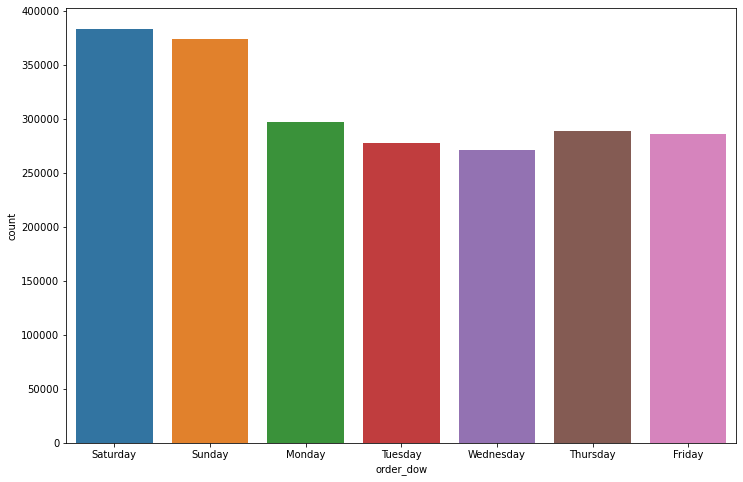

In [72]:
plt.figure(figsize=(12,8))
sns.countplot(orders_df['order_dow'])
plt.xticks(np.arange(7), ('Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'))
plt.show()

In [73]:
orders_df['order_hour_of_day'].value_counts()

10    183465
11    181129
15    180622
14    179637
13    176833
12    173706
16    173550
9     164043
17    146054
18    116919
8     113225
19     90086
20     66317
7      58648
21     49991
22     38885
23     25388
6      19412
0      14586
1       7869
5       6203
2       4911
3       3568
4       3539
Name: order_hour_of_day, dtype: int64

# Observation :
    From above we observed that at 10 and 11 are the top two hour_of_day maximum orders placed.
    We thus infer that the maximum orders are placed when the "order_hour_of_day" is 10:00 hours.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


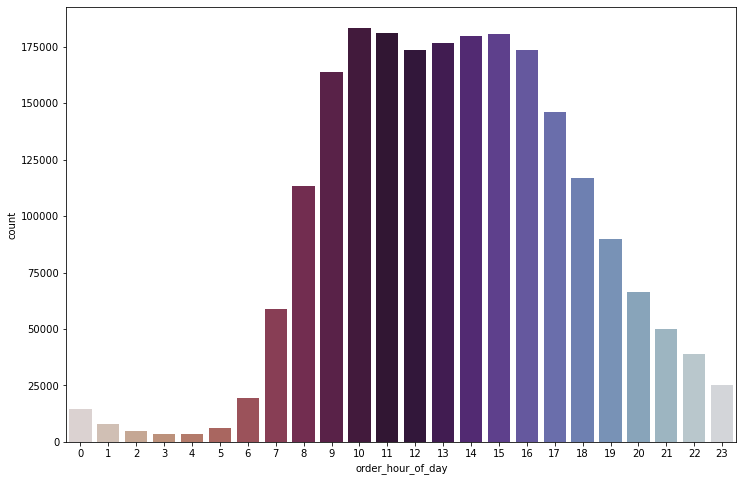

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(orders_df['order_hour_of_day'],palette='twilight_r')
plt.show()

In [75]:
for i in orders_df['order_dow'].unique():
    print("Weekday : " + str(i))
    print(orders_df['order_hour_of_day'][orders_df['order_dow']==i].value_counts()[0:1])

Weekday : 2
10    24947
Name: order_hour_of_day, dtype: int64
Weekday : 3
10    22977
Name: order_hour_of_day, dtype: int64
Weekday : 4
10    22273
Name: order_hour_of_day, dtype: int64
Weekday : 1
10    35375
Name: order_hour_of_day, dtype: int64
Weekday : 5
10    24321
Name: order_hour_of_day, dtype: int64
Weekday : 0
14    34810
Name: order_hour_of_day, dtype: int64
Weekday : 6
14    24400
Name: order_hour_of_day, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-

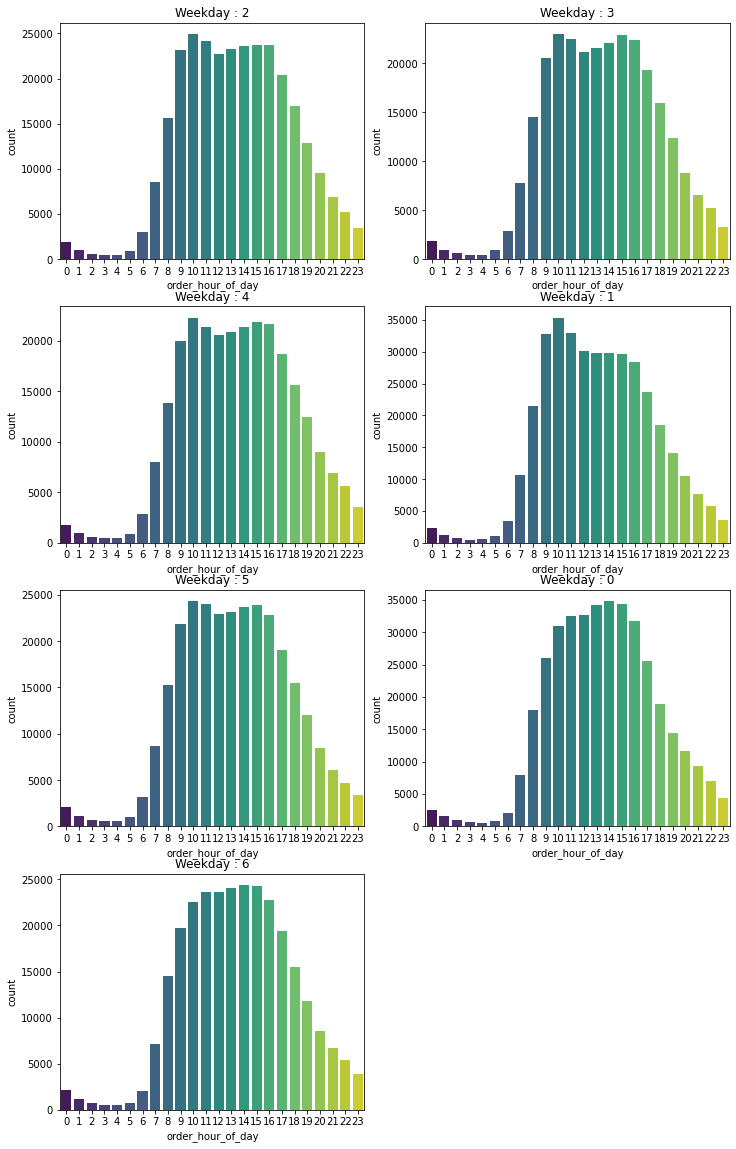

In [76]:
%matplotlib inline
row=4; col=2; pos=1
fig = plt.figure(figsize=(12,20))
for i in orders_df['order_dow'].unique():
    fig.add_subplot(row,col,pos)
    plt.title("Weekday : " + str(i))
    sns.countplot(orders_df['order_hour_of_day'][orders_df['order_dow']==i],palette='viridis')
    pos+=1
plt.show()

# Observation :
From above we observed that Weekday : 1 and hour of day is 10, 35375 i.e maximum are orders placed.

We thus infer that the maximum orders are placed when the "day of week" is 1 i.e Sunday and the hour of day is 10:00

# Question 2:
    2) What are the top 5 products?

    -    That are ordered.
    -    That are reordered.

In [77]:
combine_order_products_df = pd.concat([order_products_prior_df,order_products_train_df,order_products_test_df],
                                      keys=['prior','train','test'])

In [78]:
combine_order_products_df.head()

order_id  product_id  add_to_cart_order  reordered
prior 0         2       33120                  1          1
      1         2       28985                  2          1
      2         2        9327                  3          0
      3         2       45918                  4          1
      4         2       30035                  5          0

In [79]:
combine_order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 33819106 entries, ('prior', 0) to ('test', 316448)
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 2.7+ GB


In [80]:
#top 5 products that are ordered
combine_order_products_df['product_id'].value_counts().head()

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
Name: product_id, dtype: int64

In [81]:
top5_product_ordered = pd.concat([pd.DataFrame(dict(combine_order_products_df['product_id'].value_counts().head()).keys(),
                                       columns=['product_id']),
                          pd.DataFrame(dict(combine_order_products_df['product_id'].value_counts().head()).values(),
                                       columns=['order_count'])],axis=1)

In [82]:
top5_product_ordered =pd.merge(top5_product_ordered,products_df,on='product_id')

In [83]:
top5_product_ordered.iloc[0:5,[2,1]]

,product_name,order_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877


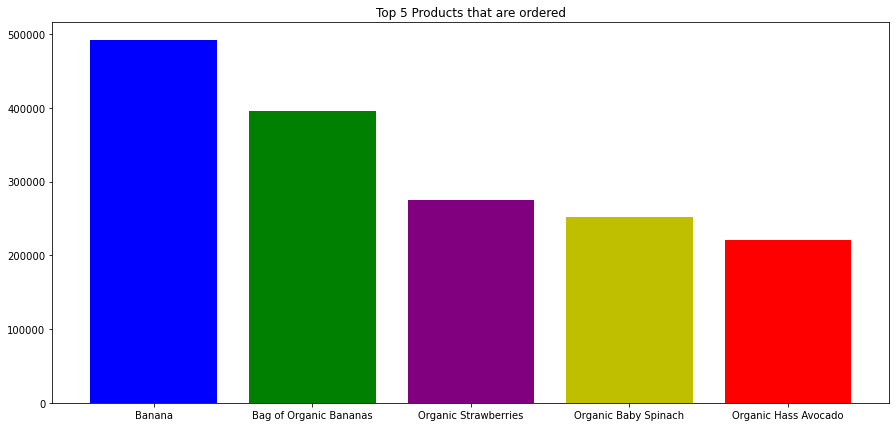

In [84]:
plt.figure(figsize=(15,7))
plt.title("Top 5 Products that are ordered")
plt.bar(top5_product_ordered['product_name'],top5_product_ordered['order_count'],color=['b','g','purple','y','r'])
plt.xticks(rotation=0);plt.show()

In [85]:
#top 5 products that are reordered
combine_order_products_df['product_id'][combine_order_products_df['reordered']==1].value_counts().head()

24852    415166
13176    329275
21137    214448
21903    194939
47209    176173
Name: product_id, dtype: int64

In [86]:
top5_product_reordered = pd.concat([pd.DataFrame(dict(combine_order_products_df['product_id'][combine_order_products_df[
    'reordered']==1].value_counts().head()).keys(), columns=['product_id']),
                                    pd.DataFrame(dict(combine_order_products_df['product_id'][combine_order_products_df[
                                        'reordered']==1].value_counts().head()).values(), columns=['order_count'])],axis=1)

In [87]:
top5_product_reordered =pd.merge(top5_product_reordered,products_df,on='product_id')

In [88]:
top5_product_reordered.iloc[0:5,[2,1]]

,product_name,order_count
0,Banana,415166
1,Bag of Organic Bananas,329275
2,Organic Strawberries,214448
3,Organic Baby Spinach,194939
4,Organic Hass Avocado,176173


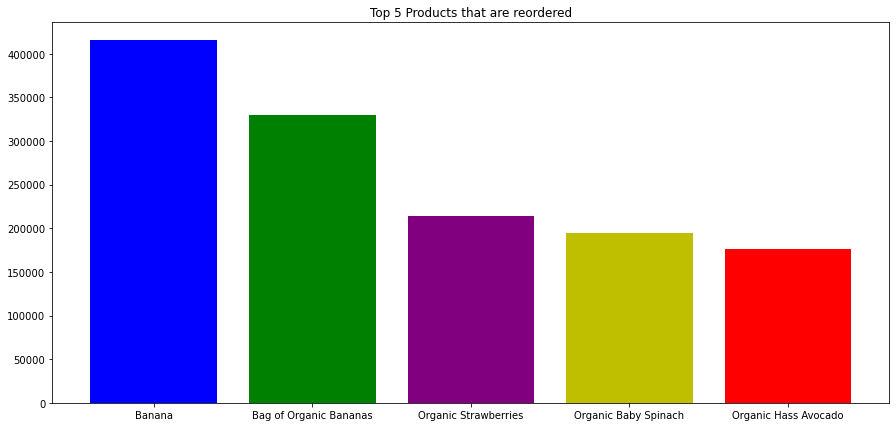

In [89]:
plt.figure(figsize=(15,7))
plt.title("Top 5 Products that are reordered")
plt.bar(top5_product_reordered['product_name'],top5_product_reordered['order_count'],color=['b','g','purple','y','r'])
plt.xticks(rotation=0);plt.show()

In [90]:
top5_product_ordered

,product_id,order_count,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


# Question 3
    3)	What is the reorder ratio for each department?

In [91]:
combine_order_product_dept_df = pd.merge(pd.merge(combine_order_products_df,orders_df,on='order_id'),
                                         pd.merge(products_df,departments_df,on='department_id'),on='product_id')

In [92]:
combine_order_product_dept_df

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_number,user_id,product_name,aisle_id,department_id,department
0,2,33120,1,1,8.0,prior,5,9,3,202279,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,7.0,prior,0,16,2,153404,Organic Egg Whites,86,16,dairy eggs
2,327,33120,5,1,8.0,prior,6,9,21,58707,Organic Egg Whites,86,16,dairy eggs
3,537,33120,2,1,3.0,prior,2,8,15,180135,Organic Egg Whites,86,16,dairy eggs
4,582,33120,7,1,10.0,prior,2,19,6,193223,Organic Egg Whites,86,16,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22026603,1999849,26734,3,0,3.0,test,6,18,67,188326,Complete Prenatal System,47,11,personal care
22026604,3089945,26734,20,0,12.0,test,1,21,5,167393,Complete Prenatal System,47,11,personal care
22026605,2169250,3718,9,0,26.0,test,6,18,17,153763,Wasabi Cheddar Spreadable Cheese,21,16,dairy eggs
22026606,2830592,5324,1,0,4.0,test,0,14,80,161928,Peach Cobbler,119,1,frozen


In [93]:
dept_order_count = pd.concat([pd.DataFrame(dict(combine_order_product_dept_df['department'].value_counts()).keys(),
                                         columns=['department']),
                            pd.DataFrame(dict(combine_order_product_dept_df['department'].value_counts()).values(),
                                         columns=['order_count'])],axis=1)

In [94]:
dept_reorder_count = pd.concat([pd.DataFrame(dict(combine_order_product_dept_df['department']
                                                  [combine_order_product_dept_df['reordered']==1].value_counts()).keys(),
                                         columns=['department']),
                            pd.DataFrame(dict(combine_order_product_dept_df['department']
                                              [combine_order_product_dept_df['reordered']==1].value_counts()).values(),
                                         columns=['reorder_count'])],axis=1)

In [95]:
combine_dept_ratio = pd.merge(dept_order_count,dept_reorder_count,on='department')

In [96]:
combine_dept_ratio['reorder_ratio']=combine_dept_ratio['reorder_count']/combine_dept_ratio['order_count']

In [97]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [98]:
combine_dept_ratio

,department,order_count,reorder_count,reorder_ratio
0,produce,6447546,4194600,0.650573
1,dairy eggs,3668700,2459739,0.670466
2,snacks,1949098,1118558,0.573885
3,beverages,1828653,1196597,0.654360
4,frozen,1524642,827856,0.542984
5,pantry,1274907,442601,0.347163
6,bakery,795949,499504,0.627558
7,canned goods,726148,333234,0.458906
8,deli,713827,434253,0.608345
9,dry goods pasta,591090,273664,0.462982


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


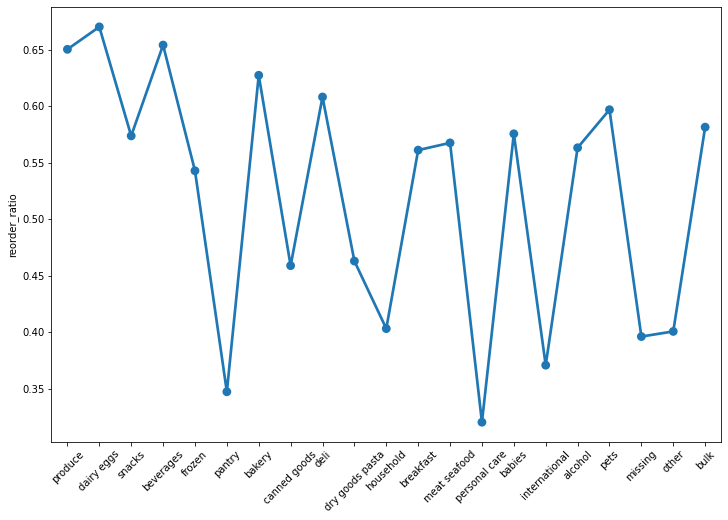

In [99]:
plt.figure(figsize=(12,8))
sns.pointplot(combine_dept_ratio['department'].unique(),combine_dept_ratio['reorder_ratio'])
plt.xticks(rotation=45)
plt.show()

In [100]:
products_df['department_id'].value_counts()

11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: department_id, dtype: int64

In [101]:
product_reorder=pd.merge(pd.DataFrame(combine_order_product_dept_df['product_id']
                                      [combine_order_product_dept_df['reordered']==1].unique(),columns=['product_id']),
                         products_df,on='product_id')

In [102]:
product_reorder.shape

(43284, 4)

In [199]:
dept_reorder_ratio=pd.merge(pd.concat([pd.DataFrame(dict(products_df['department_id'].value_counts()).keys(),
                                                    columns=['department_id']),
                                       pd.DataFrame(dict(products_df['department_id'].value_counts()).values(),
                                                    columns=['product_count'])],axis=1),
                            pd.concat([pd.DataFrame(dict(product_reorder['department_id'].value_counts()).keys(),
                                                    columns=['department_id']),
                                       pd.DataFrame(dict(product_reorder['department_id'].value_counts()).values(),
                                                    columns=['product_reorder_count'])],axis=1),
                            on='department_id')

In [200]:
dept_reorder_ratio['reorder_ratio']=dept_reorder_ratio['product_reorder_count']/dept_reorder_ratio['product_count']

In [201]:
products_df[products_df['department_id']==10]

,product_id,product_name,aisle_id,department_id
502,503,Wild Rice Blend,68,10
999,1000,Apricots,18,10
5160,5161,Dried Mango,18,10
6193,6194,Organic Red Kidney Beans,68,10
6454,6455,Organic Magic Muesli,68,10
7313,7314,Organic Quick Rolled Oats,68,10
10223,10224,Organic Hunza Golden Raisins,18,10
10539,10540,Whole Medjool Dates,18,10
10914,10915,Organic Short Brown Sprouted Rice,68,10
11324,11325,Organic Hemp Plus Granola,68,10


In [202]:
dept_reorder_ratio

,department_id,product_count,product_reorder_count,reorder_ratio
0,11,6563,4946,0.753619
1,19,6264,5736,0.915709
2,13,5371,4412,0.821449
3,7,4365,3971,0.909737
4,1,4007,3718,0.927876
5,16,3449,3294,0.955059
6,17,3085,2457,0.796434
7,15,2092,1891,0.903920
8,9,1858,1667,0.897201
9,4,1684,1604,0.952494


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


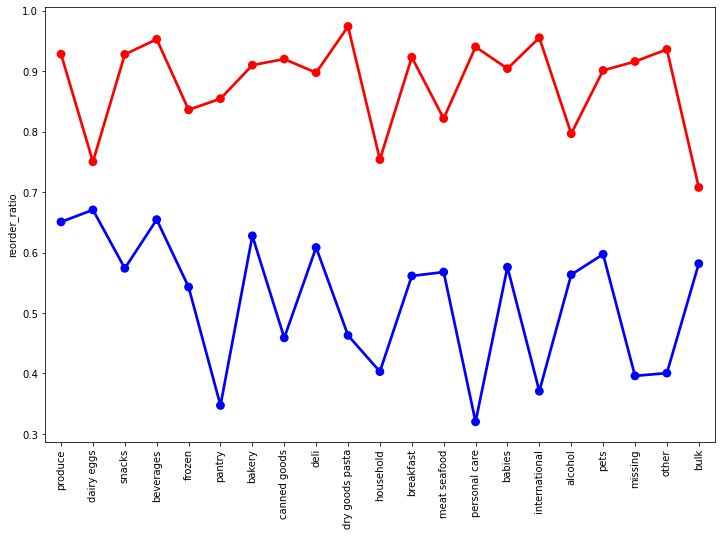

In [203]:
plt.figure(figsize=(12,8))
sns.pointplot(dept_reorder_ratio['department_id'].unique(),dept_reorder_ratio['reorder_ratio'],color='r')
sns.pointplot(combine_dept_ratio['department'].unique(),combine_dept_ratio['reorder_ratio'],color='b')
plt.xticks(rotation=90)
plt.show()

# Computation of Deparment Ratio
1. Re order ratio for each deparment product wise - Reorderd product(department)/Total products(department)
2. Mximum reorder ratio - All Rerdered products/ Total Products - of which deaprment 

In [108]:
combine_order_product_dept_df.corr()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day,order_number,user_id,aisle_id,department_id
order_id,1.000000,-0.000048,0.000183,0.000002,0.000921,0.002197,0.000615,-0.000253,-0.001295,-0.000185,0.000070
product_id,-0.000048,1.000000,0.005655,0.003879,0.000789,-0.002636,0.000905,-0.002093,-0.000349,0.001743,-0.028319
add_to_cart_order,0.000183,0.005655,1.000000,-0.134537,0.053964,-0.008812,-0.014593,-0.004965,0.000962,0.009686,0.028572
reordered,0.000002,0.003879,-0.134537,1.000000,-0.135318,-0.006986,-0.023055,0.301965,-0.002379,0.004040,-0.040059
days_since_prior_order,0.000921,0.000789,0.053964,-0.135318,1.000000,-0.030669,0.005324,-0.358705,0.001799,0.005525,-0.000041
order_dow,0.002197,-0.002636,-0.008812,-0.006986,-0.030669,1.000000,0.011340,0.016310,-0.002182,-0.002137,0.004912
order_hour_of_day,0.000615,0.000905,-0.014593,-0.023055,0.005324,0.011340,1.000000,-0.039813,-0.000887,-0.001381,-0.008719
order_number,-0.000253,-0.002093,-0.004965,0.301965,-0.358705,0.016310,-0.039813,1.000000,-0.001349,0.000076,0.000411
user_id,-0.001295,-0.000349,0.000962,-0.002379,0.001799,-0.002182,-0.000887,-0.001349,1.000000,0.000034,0.000296
aisle_id,-0.000185,0.001743,0.009686,0.004040,0.005525,-0.002137,-0.001381,0.000076,0.000034,1.000000,0.062743


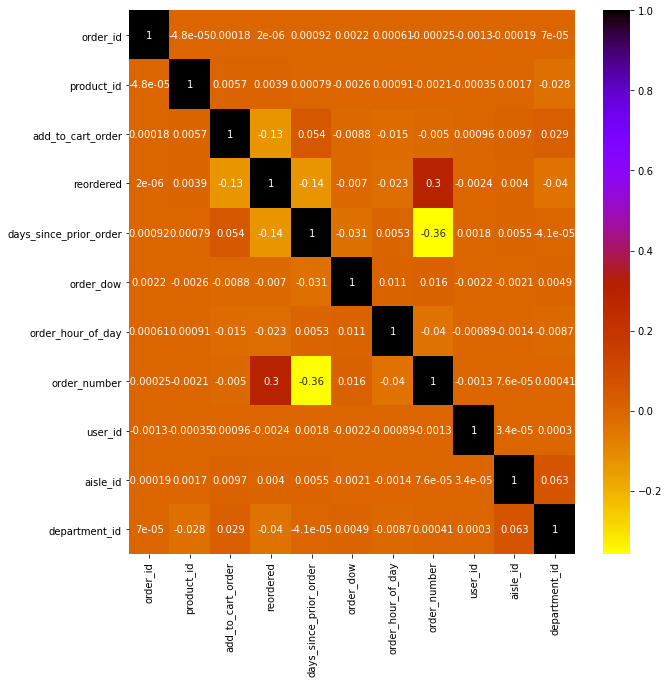

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(combine_order_product_dept_df.corr() ,annot=True,cmap='gnuplot_r')
plt.show()

In [110]:
grp_user_order_df=combine_order_product_dept_df.groupby(['user_id','order_id'])['eval_set'].aggregate('count').reset_index()

In [111]:
grp_user_order_df['user_id'].value_counts()

9106      100
66328     100
16645     100
197343    100
139038    100
         ... 
149010      4
199494      4
88299       4
39548       4
75000       4
Name: user_id, Length: 131209, dtype: int64

In [112]:
grp_user_order_df

,user_id,order_id,eval_set
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,1187899,11
4,1,2254736,5
...,...,...,...
2178581,206209,2307371,3
2178582,206209,2558525,3
2178583,206209,2977660,9
2178584,206209,3154581,13


In [113]:
grp_user_order_count=pd.concat([pd.DataFrame(dict(grp_user_order_df['user_id'].value_counts()).keys(),
                                 columns=['user_id']),
                    pd.DataFrame(dict(grp_user_order_df['user_id'].value_counts()).values(),
                                 columns=['order_count'])],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


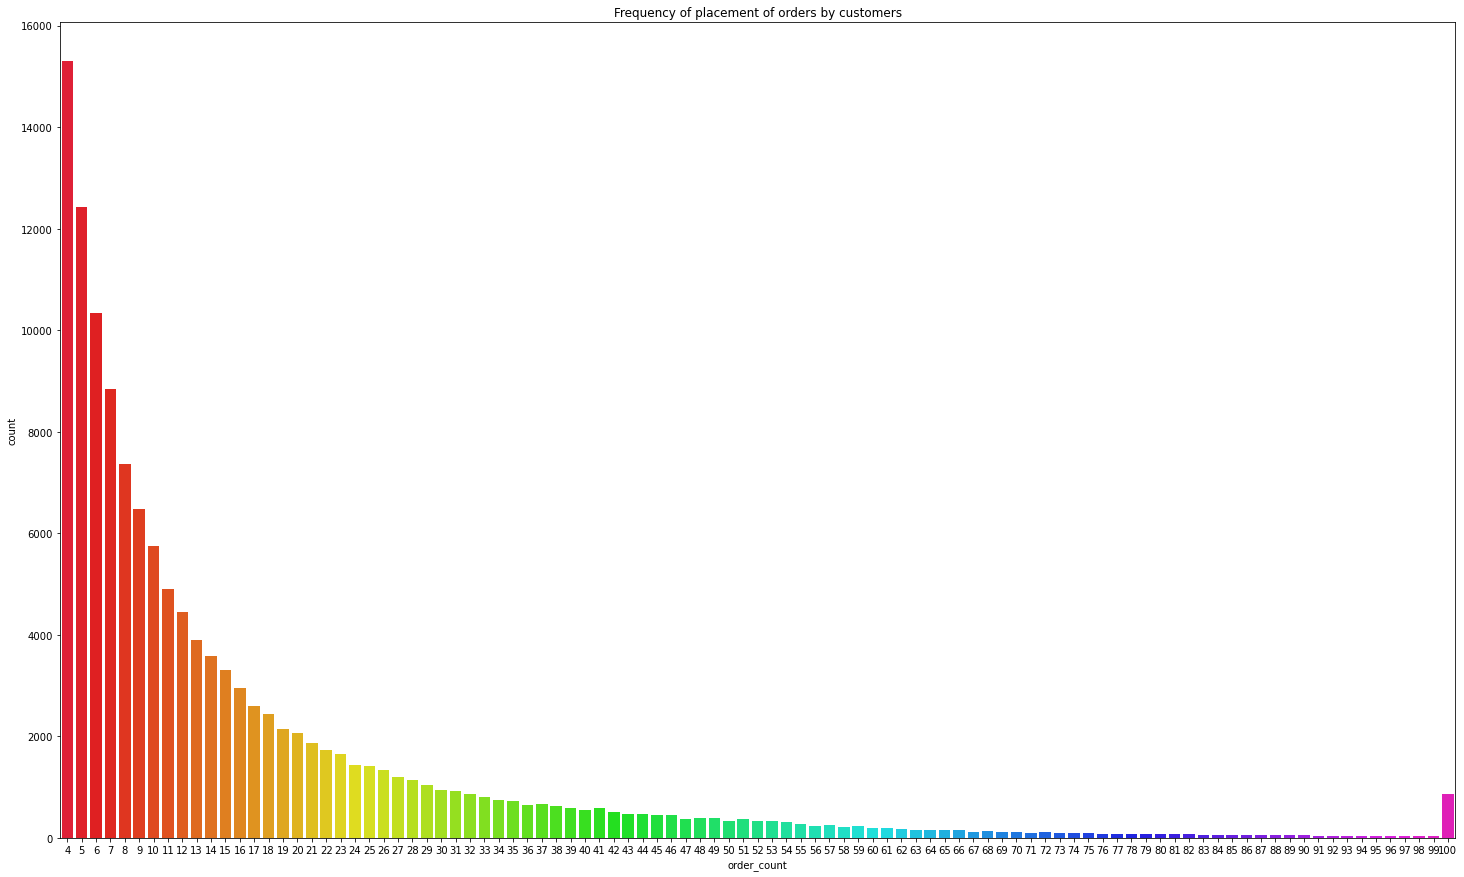

In [114]:
plt.figure(figsize=(25,15))
plt.title("Frequency of placement of orders by customers")
sns.countplot(grp_user_order_count['order_count'],palette='gist_rainbow')
# plt.yticks(np.arange(0,16000,500))
plt.show()

In [115]:
grp_user_order_count['order_count'].value_counts()

4     15300
5     12439
6     10337
7      8853
8      7357
      ...  
95       39
93       33
98       31
99       31
97       30
Name: order_count, Length: 97, dtype: int64

In [116]:
combine_order_product_dept_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'days_since_prior_order', 'eval_set', 'order_dow', 'order_hour_of_day',
       'order_number', 'user_id', 'product_name', 'aisle_id', 'department_id',
       'department'],
      dtype='object')

In [117]:
grp_user_days_since_prior_order = combine_order_product_dept_df.groupby(
    ['days_since_prior_order','user_id','order_id'])['eval_set'].aggregate('count').reset_index()

In [118]:
grp_user_days_since_prior_order['days_since_prior_order'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30.])

In [119]:
grp_user_days_since_prior_order['days_since_prior_order'].value_counts()

30.0    235153
7.0     203601
6.0     152714
4.0     141084
3.0     138840
5.0     136949
2.0     123320
8.0     115677
1.0      92953
9.0      75464
14.0     63857
10.0     60681
13.0     52970
11.0     51401
12.0     48500
0.0      42931
15.0     42249
16.0     29822
21.0     28849
17.0     24913
20.0     24458
18.0     22774
19.0     21727
22.0     20369
28.0     17072
23.0     15248
27.0     13914
24.0     13304
29.0     12269
25.0     12169
26.0     12145
Name: days_since_prior_order, dtype: int64

In [120]:
grp_user_dspo_count=pd.concat([pd.DataFrame(dict(grp_user_days_since_prior_order['days_since_prior_order'].value_counts()
                                                ).keys(), columns=['Number of Days']),
                    pd.DataFrame(dict(grp_user_days_since_prior_order['days_since_prior_order'].value_counts()).values(),
                                 columns=['order_count'])],axis=1)

In [121]:
orders_df['days_since_prior_order'].value_counts()

30.0    235153
7.0     203601
6.0     152714
4.0     141084
3.0     138840
5.0     136949
2.0     123320
8.0     115677
1.0      92953
9.0      75464
14.0     63857
10.0     60681
13.0     52970
11.0     51401
12.0     48500
0.0      42931
15.0     42249
16.0     29822
21.0     28849
17.0     24913
20.0     24458
18.0     22774
19.0     21727
22.0     20369
28.0     17072
23.0     15248
27.0     13914
24.0     13304
29.0     12269
25.0     12169
26.0     12145
Name: days_since_prior_order, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


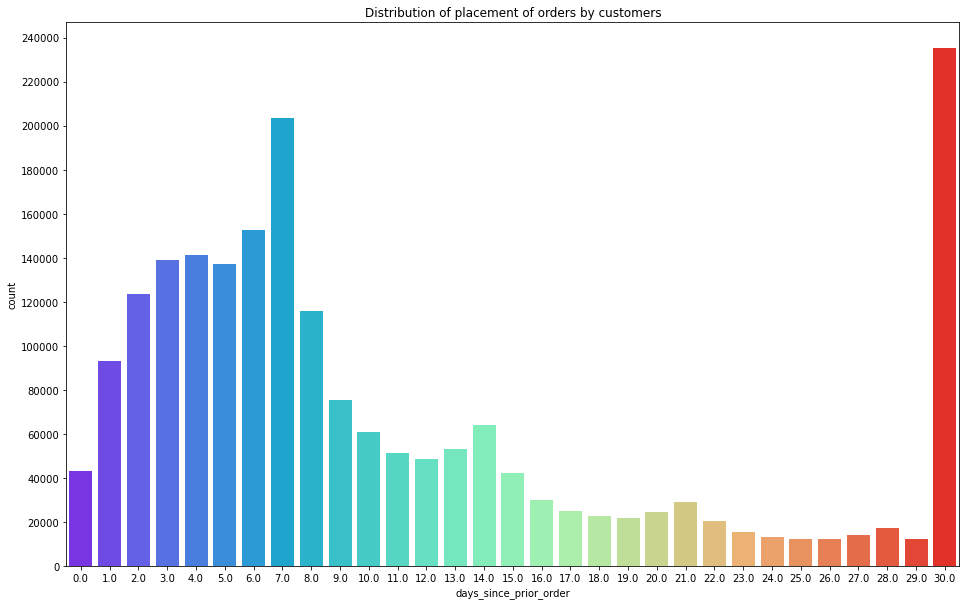

In [122]:
plt.figure(figsize=(16,10))
plt.title("Distribution of placement of orders by customers")
sns.countplot(orders_df['days_since_prior_order'],palette='rainbow')

# plt.bar(grp_user_dspo_count['Number of Days'],
#         grp_user_dspo_count['order_count'])
plt.yticks(np.arange(0,250000,20000))
# plt.xticks(np.arange(0,31,1))
plt.show()

In [123]:
grp_product_cart_order = combine_order_product_dept_df.groupby(
    ['product_name','add_to_cart_order'])['eval_set'].aggregate('count').reset_index()

In [124]:
grp_product_cart_order[grp_product_cart_order['eval_set']>10000]

,product_name,add_to_cart_order,eval_set
62875,Bag of Organic Bananas,1,53392
62876,Bag of Organic Bananas,2,43544
62877,Bag of Organic Bananas,3,32866
62878,Bag of Organic Bananas,4,24705
62879,Bag of Organic Bananas,5,19320
62880,Bag of Organic Bananas,6,15114
62881,Bag of Organic Bananas,7,12096
67288,Banana,1,75296
67289,Banana,2,54393
67290,Banana,3,39541


In [125]:
grp_product_cart_order

,product_name,add_to_cart_order,eval_set
0,#2 Coffee Filters,1,63
1,#2 Coffee Filters,2,45
2,#2 Coffee Filters,3,41
3,#2 Coffee Filters,4,36
4,#2 Coffee Filters,5,23
...,...,...,...
971009,with a Splash of Pineapple Coconut Water,16,3
971010,with a Splash of Pineapple Coconut Water,17,1
971011,with a Splash of Pineapple Coconut Water,20,1
971012,with a Splash of Pineapple Coconut Water,22,1


In [126]:
grp_product_cart_order[(grp_product_cart_order['eval_set']>10000)]

,product_name,add_to_cart_order,eval_set
62875,Bag of Organic Bananas,1,53392
62876,Bag of Organic Bananas,2,43544
62877,Bag of Organic Bananas,3,32866
62878,Bag of Organic Bananas,4,24705
62879,Bag of Organic Bananas,5,19320
62880,Bag of Organic Bananas,6,15114
62881,Bag of Organic Bananas,7,12096
67288,Banana,1,75296
67289,Banana,2,54393
67290,Banana,3,39541


In [127]:
prod_lst= list(grp_product_cart_order['product_name'][grp_product_cart_order['eval_set']>10000].unique())
prod_lst

['Bag of Organic Bananas',
 'Banana',
 'Organic Avocado',
 'Organic Baby Spinach',
 'Organic Hass Avocado',
 'Organic Raspberries',
 'Organic Strawberries',
 'Organic Whole Milk',
 'Spring Water',
 'Strawberries']

## 


# 4. Data Preprocessing

In [128]:
# train dataset
x_tr = pd.merge(order_products_train_df,orders_df,on='order_id')

In [129]:
x_tr.shape

(1068168, 10)

In [130]:
x_tr.head()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_number,user_id
0,36,39612,1,0,30.0,train,6,18,23,79431
1,36,19660,2,1,30.0,train,6,18,23,79431
2,36,49235,3,0,30.0,train,6,18,23,79431
3,36,43086,4,1,30.0,train,6,18,23,79431
4,36,46620,5,1,30.0,train,6,18,23,79431


In [131]:
# x_tr['product_id'] = x_tr['product_id'].astype('category')
# x_tr['add_to_cart_order'] = x_tr['add_to_cart_order'].astype('category')
# x_tr['reordered'] = x_tr['reordered'].astype('category')
# x_tr['days_since_prior_order'] = x_tr['days_since_prior_order'].astype('category')
# x_tr['order_dow'] = x_tr['order_dow'].astype('category')
# x_tr['order_hour_of_day'] = x_tr['order_hour_of_day'].astype('category')
# x_tr['order_number'] = x_tr['order_number'].astype('category')

In [132]:
x_train=x_tr.drop(columns=['order_id','reordered','eval_set','user_id'])

In [133]:
x_train.head()

,product_id,add_to_cart_order,days_since_prior_order,order_dow,order_hour_of_day,order_number
0,39612,1,30.0,6,18,23
1,19660,2,30.0,6,18,23
2,49235,3,30.0,6,18,23
3,43086,4,30.0,6,18,23
4,46620,5,30.0,6,18,23


In [134]:
y_train = x_tr['reordered']

In [135]:
y_train.shape

(1068168,)

In [136]:
y_train.value_counts()

1    639426
0    428742
Name: reordered, dtype: int64

In [137]:
# test dataset
x_te = pd.merge(order_products_test_df,orders_df,on='order_id')

In [138]:
x_te.shape

(316449, 10)

In [139]:
x_te.head()

,order_id,product_id,add_to_cart_order,reordered,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_number,user_id
0,1,49302,1,1,9.0,test,4,10,4,112108
1,1,11109,2,1,9.0,test,4,10,4,112108
2,1,10246,3,0,9.0,test,4,10,4,112108
3,1,49683,4,0,9.0,test,4,10,4,112108
4,1,43633,5,1,9.0,test,4,10,4,112108


In [140]:
# x_te['product_id'] = x_te['product_id'].astype('category')
# x_te['add_to_cart_order'] = x_te['add_to_cart_order'].astype('category')
# x_te['reordered'] = x_te['reordered'].astype('category')
# x_te['days_since_prior_order'] = x_te['days_since_prior_order'].astype('category')
# x_te['order_dow'] = x_te['order_dow'].astype('category')
# x_te['order_hour_of_day'] = x_te['order_hour_of_day'].astype('category')
# x_te['order_number'] = x_te['order_number'].astype('category')

In [141]:
x_test=x_te.drop(columns=['order_id','reordered','eval_set','user_id'])

In [142]:
x_test.head()

,product_id,add_to_cart_order,days_since_prior_order,order_dow,order_hour_of_day,order_number
0,49302,1,9.0,4,10,4
1,11109,2,9.0,4,10,4
2,10246,3,9.0,4,10,4
3,49683,4,9.0,4,10,4
4,43633,5,9.0,4,10,4


In [143]:
y_test = x_te['reordered']

In [144]:
y_test.shape

(316449,)

In [145]:
y_test.value_counts()

1    189398
0    127051
Name: reordered, dtype: int64

## 


# 5. Model Building
    
    5.1 Build Logistic Regression
    5.2 Naive_bayes
    5.3 Build Decision Tree
    5.4 Build Random Forest
    5.5 AdaBoost
    5.6 Gradient Boosting
    5.7 Sequential

### 5.1 Logistic Regression

In [146]:
# performing logistic regression
# create logistic regression object
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
# fit the model to the training data
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [148]:
# making predictions using the model
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [149]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_df = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_df)

[[ 45800  81251]
 [ 29865 159533]]


In [150]:
# generate model performance metrics

accuracy_lr = accuracy_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
roc_auc_lr = roc_auc_score(y_test,y_pred_lr)

print('Accuracy is :', accuracy_lr)
print('F1 Score is :', f1_lr)
print('Precision is :',precision_lr)
print('Recall is :',recall_lr)
print('Area under the curve is :', roc_auc_lr)

Accuracy is : 0.6488660100047717
F1 Score is : 0.7417000246407335
Precision is : 0.6625564821582829
Recall is : 0.8423161807410849
Area under the curve is : 0.601400670121981


# Conclusion for Logistic regression
We obtain a good F1 score of 74.17%
However, we can further try to improve the obtained accuracy which is 64.89%
The recall obtained is good i.e. 84.23% but the precision can be improved which is 66.25%

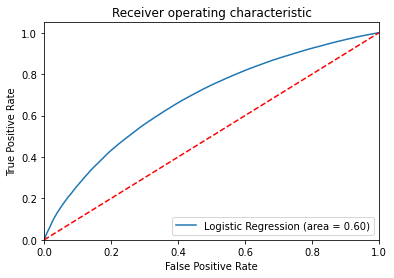

In [151]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_lr)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Feature Selection

In [152]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(abs(x_train),y_train)

In [153]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)

In [154]:
featurescore = pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns = ['Specs','Score']

In [155]:
featurescore

,Specs,Score
0,product_id,315592.145570
1,add_to_cart_order,145518.526485
2,days_since_prior_order,177294.840133
3,order_dow,54.046628
4,order_hour_of_day,441.781680
5,order_number,868981.026356


In [156]:
featurescore.sort_values('Score',ascending=False)

,Specs,Score
5,order_number,868981.026356
0,product_id,315592.145570
2,days_since_prior_order,177294.840133
1,add_to_cart_order,145518.526485
4,order_hour_of_day,441.781680
3,order_dow,54.046628


### 5.2 Naive_bayes

In [157]:
from sklearn.naive_bayes import GaussianNB
nvby = GaussianNB()
nvby.fit(x_train,y_train)
y_pred_nvby=nvby.predict(x_test)

In [158]:
accuracy_nvby = accuracy_score(y_test,y_pred_nvby)
f1_nvby=f1_score(y_test,y_pred_nvby)
precision_nvby = precision_score(y_test,y_pred_nvby)
recall_nvby = recall_score(y_test,y_pred_nvby)
roc_auc_nvby = roc_auc_score(y_test,y_pred_nvby)

print('Accuracy is :', accuracy_nvby)
print('F1 Score is :', f1_nvby)
print('Precision is :',precision_nvby)
print('Recall is :',recall_nvby)
print('Area under the curve is :', roc_auc_nvby)

Accuracy is : 0.6161182370618963
F1 Score is : 0.6705716772834143
Precision is : 0.6893381430538752
Recall is : 0.65279992396963
Area under the curve is : 0.6071179413789166


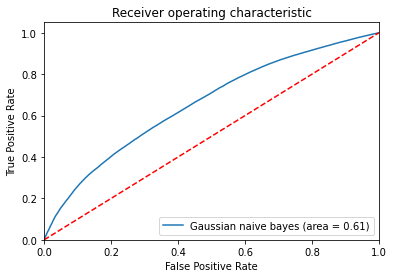

In [159]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_nvby)
fpr, tpr, thresholds = roc_curve(y_test, nvby.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian naive bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion for Gaussian naive bayes
    Algorithm             Accuracy	F1	Precision	Recalll	 AUC
    Logistic Regression   65%	    74%	66%	        86%	    60%
    Gaussian Naïve Bayes  62%	    67%	69%	        65%	    61%

    The Precision improved, but there is reduction in Accuracy, F1 and Recall

### 5.3 Decision Tree

In [160]:
dt = tree.DecisionTreeClassifier()

In [161]:
#train the model using traing data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [162]:

y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [163]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)
roc_auc_dt = roc_auc_score(y_test,y_pred_dt)

print('Accuracy is :', accuracy_dt)
print('F1 Score is :', f1_dt)
print('Precision is :',precision_dt)
print('Recall is :',recall_dt)
print('Area under the curve is :', roc_auc_dt)


Accuracy is : 0.5715834147050551
F1 Score is : 0.6388271713474315
Precision is : 0.6447184461842898
Recall is : 0.6330425875669226
Area under the curve is : 0.5565036630682366


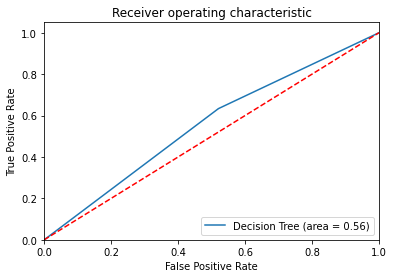

In [164]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion for Decision Trees
    Algorithm             Accuracy	F1	Precision	Recalll	    AUC
    Logistic Regression   65%	    74%	  66%	        86%	    60%
    Gaussian Naïve Bayes  62%	    67%	  69%	        65%	    61%
    Decision Trees        57%        64%      65%            63%        56%

    Again, no improvement in Accuracy, F1 and recall. AUC has reduced further. Presion is lesser than Gaussian.

### 5.4 Random Forest

In [165]:
# Build a classifier
rf = RandomForestClassifier(n_estimators=100)

In [166]:
#train the model using traing data
rf.fit(x_train,y_train)

RandomForestClassifier()

In [167]:

y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [168]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
precision_rf = precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)
roc_auc_rf = roc_auc_score(y_test,y_pred_rf)

print('Accuracy is :', accuracy_rf)
print('F1 Score is :', f1_rf)
print('Precision is :',precision_rf)
print('Recall is :',recall_rf)
print('Area under the curve is :', roc_auc_rf)

Accuracy is : 0.6309768714706003
F1 Score is : 0.709435502131143
Precision is : 0.6708737452882131
Recall is : 0.7527006620978046
Area under the curve is : 0.6011104667424426


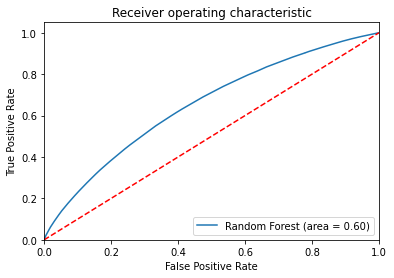

In [169]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

  # Conclusion for Random Forest
    
    Algorithm             Accuracy	F1	Precision	Recalll	    AUC
    Logistic Regression   65%	    74%	  66%	        86%	    60%
    Gaussian Naïve Bayes  62%	    67%	  69%	        65%	    61%
    Decision Trees        57%        64%      65%            63%        56%
    Random Forest         63%        71%      67%            75%        60%
    
    Some paramaters are  still less as compared to Logistic

### 5.5 AdaBoost

In [170]:
adaBoostClf= AdaBoostClassifier(n_estimators=100)

In [171]:
adaBoostClf.fit(x_test,y_test)

AdaBoostClassifier(n_estimators=100)

In [172]:
y_pred_adb=adaBoostClf.predict(x_test)
y_pred_adb

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [173]:
accuracy_adb = accuracy_score(y_test,y_pred_adb)
f1_adb=f1_score(y_test,y_pred_adb)
precision_adb = precision_score(y_test,y_pred_adb)
recall_adb = recall_score(y_test,y_pred_adb)
roc_auc_adb = roc_auc_score(y_test,y_pred_adb)

print('Accuracy is :', accuracy_adb)
print('F1 Score is :', f1_adb)
print('Precision is :',precision_adb)
print('Recall is :',recall_adb)
print('Area under the curve is :', roc_auc_adb)


Accuracy is : 0.6613261536614115
F1 Score is : 0.7405194308389969
Precision is : 0.6838407913035313
Recall is : 0.8074425284321904
Area under the curve is : 0.6254747332954413


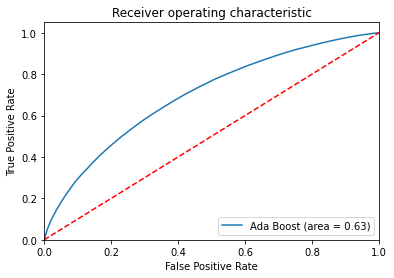

In [174]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_adb)
fpr, tpr, thresholds = roc_curve(y_test, adaBoostClf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

  # Conclusion for Adaboost 
    
    Algorithm             Accuracy	F1	Precision	Recalll	    AUC
    Logistic Regression   65%	    74%	  66%	        86%	    60%
    Gaussian Naïve Bayes  62%	    67%	  69%	        65%	    61%
    Decision Trees        57%        64%      65%            63%        56%
    Random Forest         63%        71%      67%            75%        60%
    Adaboost              66%        74%      68%            81%        63%
    
    
    Recall is lesser than  Logistic, but Acc and F1 same and Precision has improved

### 5.6 Gradient Boosting

In [175]:
GrdBoostclf = GradientBoostingClassifier(n_estimators=100)

In [176]:
GrdBoostclf.fit(x_train, y_train)

GradientBoostingClassifier()

In [177]:
y_pred_grdb = GrdBoostclf.predict(x_test)

In [178]:
accuracy_grdb = accuracy_score(y_test,y_pred_grdb)
f1_grdb=f1_score(y_test,y_pred_grdb)
precision_grdb = precision_score(y_test,y_pred_grdb)
recall_grdb = recall_score(y_test,y_pred_grdb)
roc_auc_grdb = roc_auc_score(y_test,y_pred_grdb)

print('Accuracy is :', accuracy_grdb)
print('F1 Score is :', f1_grdb)
print('Precision is :',precision_grdb)
print('Recall is :',recall_grdb)
print('Area under the curve is :', roc_auc_grdb)

Accuracy is : 0.6632601145840246
F1 Score is : 0.7430463288715702
Precision is : 0.6838281308946301
Recall is : 0.8134932787041046
Area under the curve is : 0.6263985901434668


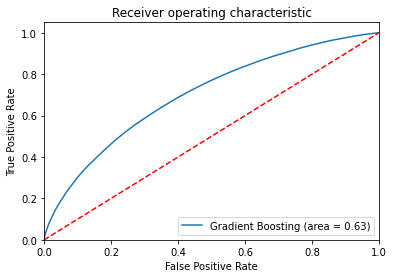

In [179]:
# ROC curve

logit_roc_auc = roc_auc_score(y_test, y_pred_grdb)
fpr, tpr, thresholds = roc_curve(y_test, GrdBoostclf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [180]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_df = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_df)

[[ 45800  81251]
 [ 29865 159533]]


  # Conclusion for Gradient 
    
    Algorithm             Accuracy	F1	Precision	Recalll	    AUC
    Logistic Regression   65%	    74%	  66%	        86%	    60%
    Gaussian Naïve Bayes  62%	    67%	  69%	        65%	    61%
    Decision Trees        57%        64%      65%            63%        56%
    Random Forest         63%        71%      67%            75%        60%
    Adaboost              66%        74%      68%            81%        63%
    Gradient              66%        74%      68%            81%        63%
    Improvement in the Precision and Accuracy wrt Logistic

### 5.7 Sequential

In [181]:
minmax = preprocessing.MinMaxScaler()

In [182]:
train_x_scaled = minmax.fit_transform(x_train)
test_x_scaled = minmax.fit_transform(x_test)

In [183]:
# making the ANN
# Initialise the ANN(artificial neural network) classifier
seqclf = Sequential()

In [184]:
len(x_train.columns)

6

In [185]:
# total input nodes = number of input features
inputnode = len(x_train.columns)
outputnode = 1 # since there is only 1 Y-variable
totalclasses = len(y_train.unique()) # binary classes [0,1]

In [186]:
# Units: A Positive integer, dimensionality of the output space.    
units = np.ceil((inputnode+outputnode)/totalclasses).astype(np.int32)
print(units)

4


In [187]:
# input layer and 1st hidden layer
# --------------------------------
seqclf.add(Dense(units=units, kernel_initializer='uniform', activation='relu',input_dim=inputnode))

In [188]:
# 2nd hidden layer
# ----------------
seqclf.add(Dense(units=units, kernel_initializer='uniform', activation='relu'))

In [189]:
# output layer
# ------------
# units -> number of output nodes (Y-variable)
# activation -> 'sigmoid' for binary; 'softmax' for multiclass
seqclf.add(Dense(units=outputnode, kernel_initializer='uniform', activation='sigmoid'))


In [190]:
# compile the ANN
# ---------------
'''
optimizer: method to select the random weights (stochastic gradient descent)

loss fn: logarithmic loss function
         binary class --> binary_crossentropy
         multi class  --> categorical_crossentropy
         
metrics: Evaluation technique for classification, it is the 'accuracy' metric
'''
seqclf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [191]:
# fit the ANN with the train data
# -------------------------------
'''
batch size: number of observations after which weights are updated
'''
# train with more epochs for better accuracy
seqclf.fit(train_x_scaled, y_train, batch_size=10, epochs=10)

Epoch 1/10
1068168/1068168 [==============================] - 76s 71us/step - loss: 0.6303 - accuracy: 0.64620s - los
Epoch 2/10
1068168/1068168 [==============================] - 79s 74us/step - loss: 0.6278 - accuracy: 0.6495
Epoch 3/10
1068168/1068168 [==============================] - 78s 73us/step - loss: 0.6277 - accuracy: 0.6494
Epoch 4/10
1068168/1068168 [==============================] - 77s 72us/step - loss: 0.6277 - accuracy: 0.6496
Epoch 5/10
1068168/1068168 [==============================] - 77s 72us/step - loss: 0.6277 - accuracy: 0.6494
Epoch 6/10
1068168/1068168 [==============================] - 78s 73us/step - loss: 0.6277 - accuracy: 0.6496
Epoch 7/10
1068168/1068168 [==============================] - 79s 74us/step - loss: 0.6276 - accuracy: 0.6497
Epoch 8/10
1068168/1068168 [==============================] - 79s 74us/step - loss: 0.6277 - accuracy: 0.64940s - loss: 0.6277 - accuracy: 
Epoch 9/10
1068168/1068168 [==============================] - 79s 74us/step - loss

In [192]:
# predict the test
# ----------------
pred_y_seq = seqclf.predict(test_x_scaled)
# pred_y = (pred_y <= 0.5)


In [193]:
# get the count of 0 and 1 of the Y-variable
total = len(y_test)
neg = list(y_test).count(0)
pos = list(y_test).count(1)


In [194]:
print("Proportions: Class 0 = {0}, Class 1 = {1}".format(format(neg/total,'.2f'), format(pos/total,'.2f')))


Proportions: Class 0 = 0.40, Class 1 = 0.60


In [195]:
df_results = pd.DataFrame({'actual':y_test,
                          'probs':np.concatenate(pred_y_seq),
                          'predicted':0})

df_results[0:20]

,actual,probs,predicted
0,1,0.666730,0
1,1,0.638384,0
2,0,0.612962,0
3,0,0.591220,0
4,1,0.564179,0
5,0,0.534069,0
6,0,0.512179,0
7,1,0.492399,0
8,1,0.687615,0
9,1,0.665824,0


In [196]:
# convert the probabilities between 0 and 1
range1=np.linspace(0.1,0.9,18)
for e in range1:
    
    df_results.predicted[df_results.probs < e] = 0
    df_results.predicted[df_results.probs >= e] = 1
 
    count0=len(df_results.predicted[df_results.predicted==0])
    count1=len(df_results.predicted[df_results.predicted==1])
    
    print("Cutoff={}, Class 0={}, Class 1={}".format(e,count0,count1))



len(df_results.predicted[df_results.predicted == 0])
len(df_results.predicted[df_results.predicted == 1])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarni

Cutoff=0.1, Class 0=0, Class 1=316449
Cutoff=0.14705882352941177, Class 0=0, Class 1=316449
Cutoff=0.19411764705882353, Class 0=0, Class 1=316449
Cutoff=0.2411764705882353, Class 0=0, Class 1=316449
Cutoff=0.28823529411764703, Class 0=0, Class 1=316449
Cutoff=0.33529411764705885, Class 0=5270, Class 1=311179
Cutoff=0.38235294117647056, Class 0=17539, Class 1=298910
Cutoff=0.4294117647058824, Class 0=41347, Class 1=275102
Cutoff=0.4764705882352941, Class 0=69944, Class 1=246505
Cutoff=0.5235294117647059, Class 0=104985, Class 1=211464
Cutoff=0.5705882352941176, Class 0=142719, Class 1=173730
Cutoff=0.6176470588235293, Class 0=184417, Class 1=132032
Cutoff=0.6647058823529411, Class 0=222458, Class 1=93991
Cutoff=0.711764705882353, Class 0=252008, Class 1=64441
Cutoff=0.7588235294117647, Class 0=272169, Class 1=44280
Cutoff=0.8058823529411764, Class 0=286974, Class 1=29475
Cutoff=0.8529411764705882, Class 0=298294, Class 1=18155
Cutoff=0.9, Class 0=306555, Class 1=9894


9894

In [197]:
conf_matrix = confusion_matrix(df_results.actual,df_results.predicted)
print(conf_matrix)

[[125602   1449]
 [180953   8445]]


In [198]:
from sklearn.metrics import classification_report as cr

# classification report
print(cr(df_results.actual,df_results.predicted))

              precision    recall  f1-score   support

           0       0.41      0.99      0.58    127051
           1       0.85      0.04      0.08    189398

    accuracy                           0.42    316449
   macro avg       0.63      0.52      0.33    316449
weighted avg       0.68      0.42      0.28    316449

